In [31]:
import pandas as pd
import numpy as np
import feather

import time

In [1]:
path = './Data/'

We next incorporate signals about attributes of users. These attributes can be, for example, age, specified preference, number of products users have used so far, so on and so forth. Features extracted out of these attributes are likely to contribute to the predictive power of the model. 

These features are custom-defined by LeanPlum's customers who specify what attributes of their users they want to track on LeanPlum's platform. While knowing that each attribute records is highly important to extract meaningful and interpretable features, we don't have access to such information for confidentialily reasons - we only have the encoded names of the attributes (for instance, attribute number 2), not the business-meaningful names. Additionally, keeping in mind that LeanPlum has various customers, each of whom tracks different attributes of their own app users, we desire to build a model with good generalization that can be applied to other apps as well. 

Because of these contraints and motivation, our approach was to use summary statistics such as mode, mean, max, min to capture signals in the attributes.

# Reading data in

This data set is more than 23GB in size. As it does not fit the memory of our local machine, we look for ways to reduce it to a more managable size:

* Only read in relevant information (eg. there's a column of the hashId of the app which is very heavy but not relevant to our use case because all the data concerns one singly app).

* Change the type of columns into more memory-efficient datatypes (eg. save user_id_hash which is also a very heavy column in "category" type rather than string)

* Then save to feather format for faster file-reading in the next time we worked with this dataset.

Run this in the first time:

In [5]:
attrib_types = {'session_id':np.uint64, 'attribute': 'category', 
                'attribute_value':'object', 'user_id_hash':'category'}
attributes = pd.read_csv('./Data/attributes.csv', usecols=attrib_types.keys(), dtype=attrib_types)

In [6]:
attributes = attributes.sort_values(by='user_id_hash', kind='mergesort')

In [10]:
feather.write_dataframe(attributes, './Data/attributes_good.feather')

Then pick up from here:

In [15]:
attributes = feather.read_dataframe('./Data/attributes_good.feather')

In [11]:
labels = pd.read_csv('../labels.csv')
labels = labels.set_index('user_id_hash')

In [16]:
attributes = attributes.set_index('user_id_hash')

In [13]:
# df = attributes.join(labels)

# EDA

Number of rows and columns in the dataset:

In [20]:
attributes.shape

(185590092, 3)

Number of attributes tracked by this app:

In [18]:
len(attributes['attribute'].unique())

30

Seemingly all attributes are tracked/recorded in each and every session.

In [19]:
attributes['attribute'].value_counts()

4     6776351
3     6776351
1     6776351
10    6776351
11    6776351
13    6776351
14    6776351
15    6776351
16    6776351
17    6776351
18    6776351
19    6776351
20    6776351
21    6776351
0     6776351
5     6776351
52    6776351
6     6776351
7     6776351
8     6776351
9     6776351
75    6776297
76    6776297
77    6776297
78    6685459
66    6614104
48    6183014
67    3395545
96      79643
49         65
Name: attribute, dtype: int64

### Check unique values of each attribute
To decide if that attribute should be treated as a discrete/continuous variable, incremental or not --> whether to use mode, mean, min, and/or max or not.

Attributes that are continuous have a long list of unique values so we comment them out here for a better display.

In [1]:

# df[df['attribute']=='5']['attribute_value'].unique()

In [2]:
# attributes[attributes['attribute']=='4']['attribute_value'].unique()

In [3]:
# attribute 7 is the troublesome one
# df[df['attribute']=='7']['attribute_value'].unique()

In [22]:
attributes[attributes['attribute']=='8']['attribute_value'].unique()

array(['1', '4', '8', '9', '10', '2', '12', '5', '7', '0', '3', '6', '13',
       '11', '22', '19', '18', '28', '16', '14', '15', '17', '21', '20',
       '39', '29', '30', '25', '32', '26', '27', '33', '31', '23', '24',
       '48', '34', '44', '47', '40', '36', '38', '37', '35', '41', '46',
       '43', '42', '51', '50', '49', '45', '56', '54', '62', '61', '52',
       '60', '53', '58', '55'], dtype=object)

In [4]:
# attributes[attributes['attribute']=='75']['attribute_value'].unique()

In [24]:
attributes[attributes['attribute']=='18']['attribute_value'].unique()

array(['0', '26', '45', '65', '13', '23', '1', '8', '10', '50', '33',
       '17', '3', '53', '15', '11', '28', '12', '30', '6', '18', '25',
       '35', '38', '5', '2', '14', '27', '36', '16', '40', '21', '20',
       '48', '34', '29', '9', '47', '7', '4', '19', '22', '46', '37',
       '41', '31', '24', '32', '49', '39', '43', '55', '42', '51', '63',
       '9999', '999999', '58', '999'], dtype=object)

In [5]:
# attributes[attributes['attribute']=='10']['attribute_value'].unique()

In [6]:
# attributes[attributes['attribute']=='11']['attribute_value'].unique()

In [27]:
attributes[attributes['attribute']=='13']['attribute_value'].unique()

array(['0.06', '0.03', '0.00', ..., '270.50', '288.66', '130.43'],
      dtype=object)

In [28]:
attributes[attributes['attribute']=='14']['attribute_value'].unique()

array(['0.00', '178.21', '169.83', ..., '268.98', '270.37', '288.53'],
      dtype=object)

In [7]:
# attributes[attributes['attribute']=='15']['attribute_value'].unique()

In [37]:
## Plot the correlation matrix for the numerical values
selectedDF = df[df['attribute']=='4'][['attribute_value', 'label_7']]
selectedDF['attribute_value'] = selectedDF['attribute_value'].astype(float)

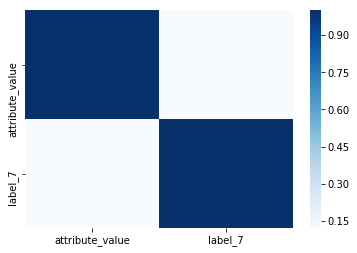

In [38]:
import seaborn as sns
sns.heatmap(selectedDF.corr(),
       xticklabels=selectedDF.corr().columns,
       yticklabels=selectedDF.corr().columns,
          cmap="Blues",
          fmt='d')

In [34]:
# attribute 1 is continuous
df[df['attribute']=='1']['attribute_value'].unique()

array(['7', '3', '58', ..., '696', '1642', '1567'], dtype=object)

In [8]:

# df[df['attribute']=='3']['attribute_value'].unique()

In [9]:

# df[df['attribute']=='6']['attribute_value'].unique()

In [81]:

df[df['attribute']=='8']['attribute_value'].unique()

array(['8', '2', '6', '7', '5', '3', '1', '4', '0', '9', '11', '10', '12',
       '18', '13', '15', '19', '16', '14', '17', '31', '35', '20', '23',
       '50', '25', '24', '26', '27', '28', '21', '32', '22', '34', '47',
       '30', '29', '37', '33', '48', '44', '36', '43', '45', '62', '41',
       '49', '46', '42', '40', '38', '39', '53', '52', '51', '60', '54',
       '61', '56', '58', '55'], dtype=object)

In [79]:

df[df['attribute']=='0']['attribute_value'].unique()

array(['4', '0', '2', '3', '1', '8', '7', '5', '6', '9', '10', '11', '20',
       '19', '37', '14', '15', '12', '13', '17', '23', '21', '18', '16',
       '22', '27', '41', '28', '39', '29', '107', '48', '26', '30', '40',
       '46', '24', '35', '25', '31', '42', '44', '36', '71', '32', '54',
       '45', '91', '49', '105', '60', '47', '43', '34', '33', '50', '165',
       '38', '73', '74', '53', '66', '69', '62', '52', '85', '170', '59',
       '61', '51', '64', '55', '70', '81', '93', '56', '101', '57', '76',
       '86', '160', '92', '65', '97', '78', '63', '178', '83', '72', '90',
       '88', '187', '117', '58', '100', '67', '167', '94', '68', '87',
       '77', '126', '79', '108', '109', '154', '179', '177', '114', '195',
       '161', '89', '137', '82', '75', '182', '80', '84', '155', '131',
       '166', '181', '112', '102'], dtype=object)

In [114]:
attr_b_7[attr_b_7['attribute']=='0'].groupby('user_id_hash')['attribute_value'].value_counts()

user_id_hash                                                      attribute_value
00000db35682058bb7916cb90f85709f54c1a0f7a3b6de247d94b1bc20c36b97  0                  12
                                                                  1                   3
000059859ec188af6035870faf885c3038cedda05b3a5480a8223649629d951e  0                  12
000062e9be78f3da274fec338e78f89d12000e781967f23e248af3904cb5b3b7  0                  17
                                                                  1                   3
00006ad44c0d33a2a526caf75514643639b7b7070dfffd6d5abdb9e4f8099108  0                   8
000081a7d841b0f953bdba6c185fd5cc335fd6015a30c3035fbf5496aab9be7c  0                   4
0000a464ad921c3288e73a3a788b5f113cabf84251a74b269e32da9110e8bca3  0                   2
0000bc4e8bfc829d327fa69bdc426dd8a789c52550ed87611492c62e2e6a9540  0                   9
0000c5de50d243cc39f6ac4268d7511705585ca3f2a20f14d21730961e7e5bc9  0                   3
0000c91fb9908357cc11974d0fc67a260ddb46

In [54]:
df.shape

(185590092, 5)

# Batch 1: attributes 1, 3, 4, 6, 0, 8

## Extract features for before 7

In [65]:
selected_session = pd.read_csv('../Data/events_before_7_good.csv', 
                               usecols=['user_id_hash', 'session_id']).drop_duplicates()


In [66]:
selected_session.shape

(4741260, 2)

In [70]:
attr_b_7 = attributes.reset_index().merge(selected_session, how='inner', on=['user_id_hash', 'session_id'])
attr_b_7.shape

(131372650, 4)

In [71]:
df_clean_7 = pd.DataFrame()

In [72]:
df_clean_7['attribute_1'] = attr_b_7[attr_b_7['attribute']=='1']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [75]:
df_clean_7['attribute_3'] = attr_b_7[attr_b_7['attribute']=='3']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [76]:
df_clean_7['attribute_4'] = attr_b_7[attr_b_7['attribute']=='4']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [80]:
df_clean_7['attribute_6'] = attr_b_7[attr_b_7['attribute']=='6']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [115]:
df_clean_7['attribute_0'] = attr_b_7[attr_b_7['attribute']=='0']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [116]:
df_clean_7['attribute_8'] = attr_b_7[attr_b_7['attribute']=='8']\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [117]:
df_clean_7.head()

,attribute_1,attribute_3,attribute_4,attribute_6,attribute_0,attribute_8
user_id_hash,,,,,,
00000db35682058bb7916cb90f85709f54c1a0f7a3b6de247d94b1bc20c36b97,14.733333,11.866667,0.101333,9.666667,0.20,1.866667
000059859ec188af6035870faf885c3038cedda05b3a5480a8223649629d951e,0.000000,0.166667,0.023333,7.833333,0.00,1.000000
000062e9be78f3da274fec338e78f89d12000e781967f23e248af3904cb5b3b7,0.000000,0.000000,0.099000,12.200000,0.15,3.050000
00006ad44c0d33a2a526caf75514643639b7b7070dfffd6d5abdb9e4f8099108,0.000000,0.000000,0.056250,5.375000,0.00,1.000000
000081a7d841b0f953bdba6c185fd5cc335fd6015a30c3035fbf5496aab9be7c,0.000000,0.000000,0.000000,0.500000,0.00,1.000000


In [118]:
features_7 = feather.read_dataframe('../Data/features_before_7_v5.feather').set_index('user_id_hash')
features_7 = features_7.join(df_clean_7)

In [120]:
feather.write_dataframe(features_7.reset_index(), '../Data/features_before_7_v6.feather')

In [61]:
f_b_7 = feather.read_dataframe('./Data/features_before_7_v6.feather')

In [62]:
f_b_7.isnull().sum()

user_id_hash                 0
num_session                  0
last_active                  0
receive_message              0
accept_message               0
life_time_value              0
num_purchase                 0
avg_purchase                 0
num_event                    0
event_per_session            0
did_purchase_binary          0
last_purchase                0
last_date_event_0            0
last_date_event_1            0
last_date_event_10           0
last_date_event_11           0
last_date_event_14           0
last_date_event_3            0
last_date_event_32           0
last_date_event_4            0
last_date_event_40           0
last_date_event_41           0
last_date_event_42           0
last_date_event_43           0
last_date_event_44           0
last_date_event_45           0
last_date_event_47           0
last_date_event_48           0
last_date_event_49           0
last_date_event_5            0
                          ... 
last_date_event_51           0
last_dat

## Extract similar features for before 14

In [123]:
selected_session = pd.read_csv('./Data/events_before_14_good.csv', 
                               usecols=['user_id_hash', 'session_id']).drop_duplicates()


attr_b_14 = attributes.reset_index().merge(selected_session, how='inner', on=['user_id_hash', 'session_id'])

In [124]:
df_clean_14 = pd.DataFrame()

for event in ['1', '3', '4', '6', '0', '8']:
    df_clean_14['attribute_'+event] = attr_b_14[attr_b_14['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())

In [125]:
features_14 = feather.read_dataframe('../Data/features_before_14_v5.feather').set_index('user_id_hash')
features_14 = features_14.join(df_clean_14)
feather.write_dataframe(features_14.reset_index(), '../Data/features_before_14_v6.feather')

## Extract similar features for the entire data

In [34]:
attributes['attribute'] = attributes['attribute'].astype(int)

In [67]:
# feather.write_dataframe(attributes, './Data/attributes_good.feather')

In [43]:
selected_users = pd.read_csv('sample_submission_2.csv')['user_id_hash']

In [50]:
attributes = attributes.reset_index()

In [51]:
df = attributes[attributes['user_id_hash'].isin(selected_users)]

In [52]:
df.shape

(94692247, 4)

In [72]:
df_clean_all = pd.DataFrame()

for event in [1, 3, 4, 6, 0, 8]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_all['attribute_'+str(event)] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')


Extracting feature from attribute 1
Time extracting event 1 in minutes is 2.1064974347750347

Extracting feature from attribute 3
Time extracting event 3 in minutes is 2.203840680917104

Extracting feature from attribute 4
Time extracting event 4 in minutes is 2.0494138836860656

Extracting feature from attribute 6
Time extracting event 6 in minutes is 2.064106750488281

Extracting feature from attribute 0
Time extracting event 0 in minutes is 2.0471148689587912

Extracting feature from attribute 8
Time extracting event 8 in minutes is 2.1631346503893534


In [85]:
features_all = feather.read_dataframe('./Data/features_v5.feather').set_index('user_id_hash')
features_all = features_all.join(df_clean_all, how='inner')
features_all = features_all.dropna()
feather.write_dataframe(features_all.reset_index(), './Data/features_v6.feather')

In [86]:
t = feather.read_dataframe('./Data/features_v6.feather')
t.head()

,user_id_hash,num_session,last_active,receive_message,accept_message,life_time_value,num_purchase,avg_purchase,num_event,event_per_session,...,receive_message_per_day,accept_message_per_day,num_purchase_per_day,life_time_value_per_day,attribute_1,attribute_3,attribute_4,attribute_6,attribute_0,attribute_8
0,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,3,65,0,0,0.0,0,0.0,47,15.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,1.0
1,037215beb36f0d10992c8accc1862d0d651f46d6103d94...,1,16,0,0,0.0,0,0.0,5,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.06,10.0,0.0,1.0
2,04b6836e16e8565796440451c969cd81187f9c97de9692...,2,61,0,0,0.0,0,0.0,15,7.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0
3,05cc2a92cad75dabe8739770ea87e8ee14eb4b70bdc2dd...,3,53,0,0,0.0,0,0.0,37,12.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.0,1.0
4,07d03d7980cdfbda6c2ace8522d37b47dbc9e88431e60e...,1,59,0,0,0.0,0,0.0,2,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


# Batch 2: attributes 11, 13, 14, 15

In [122]:
selected_users = pd.read_csv('sample_submission_2.csv')['user_id_hash']

df = attributes[attributes['user_id_hash'].isin(selected_users)]

In [123]:
df.shape

(94692247, 4)

In [124]:
# extract max 
df_clean_all = pd.DataFrame()

for event in [11, 13, 14, 15]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_all['attribute_'+str(event)+'_max'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).max())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')


Extracting feature from attribute 11
Time extracting event 11 in minutes is 2.5877873301506042

Extracting feature from attribute 13
Time extracting event 13 in minutes is 2.1575803995132445

Extracting feature from attribute 14
Time extracting event 14 in minutes is 2.15907084941864

Extracting feature from attribute 15
Time extracting event 15 in minutes is 2.2088744322458904


In [94]:
# extract mean 

for event in [13, 14]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_all['attribute_'+str(event)+'_mean'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')


Extracting feature from attribute 13
Time extracting event 13 in minutes is 2.219916749000549

Extracting feature from attribute 14
Time extracting event 14 in minutes is 2.2079663554827373


In [125]:
df_clean_all = df_clean_all.dropna()

features_all = feather.read_dataframe('./Data/features_v7.feather').set_index('user_id_hash')
features_all = features_all.join(df_clean_all, how='inner')
feather.write_dataframe(features_all.reset_index(), './Data/features_v7.feather')

In [129]:
t = feather.read_dataframe('./Data/features_v7.feather')
t.columns

Index(['user_id_hash', 'num_session', 'last_active', 'receive_message',
       'accept_message', 'life_time_value', 'num_purchase', 'avg_purchase',
       'num_event', 'event_per_session', 'did_purchase_binary',
       'last_purchase', 'last_date_event_0', 'last_date_event_1',
       'last_date_event_10', 'last_date_event_11', 'last_date_event_14',
       'last_date_event_3', 'last_date_event_32', 'last_date_event_4',
       'last_date_event_40', 'last_date_event_41', 'last_date_event_42',
       'last_date_event_43', 'last_date_event_44', 'last_date_event_45',
       'last_date_event_47', 'last_date_event_48', 'last_date_event_49',
       'last_date_event_5', 'last_date_event_50', 'last_date_event_51',
       'last_date_event_52', 'last_date_event_54', 'last_date_event_55',
       'last_date_event_56', 'last_date_event_57', 'last_date_event_58',
       'last_date_event_59', 'last_date_event_6', 'last_date_event_60',
       'last_date_event_61', 'last_date_event_62', 'last_date_event_6

## Extract similar features for before 14

In [107]:
selected_session = pd.read_csv('./Data/events_before_14_good.csv', 
                               usecols=['user_id_hash', 'session_id']).drop_duplicates()


attr_b_14 = attributes.merge(selected_session, how='inner', on=['user_id_hash', 'session_id'])

attr_b_14['attribute'] = attr_b_14['attribute'].astype(int)

In [108]:
attr_b_14['user_id_hash'] = attr_b_14['user_id_hash'].astype('category')

In [109]:
feather.write_dataframe(attr_b_14, './Data/attributes_before_14.feather')

In [115]:
attr_b_14 = feather.read_dataframe('./Data/attributes_before_14.feather')

In [131]:
attributes.shape

(185590092, 4)

In [130]:
attr_b_14.shape

(121341782, 4)

In [ ]:
df = attr_b_14

# extract mean 

for event in [13, 14]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_14['attribute_'+str(event)+'_mean'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')

In [135]:
df = attr_b_14

# extract max 

df_clean_14 = pd.DataFrame()

for event in [11, 13, 14, 15]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_14['attribute_'+str(event)+'_max'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).max())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')
    


Extracting feature from attribute 11
Time extracting event 11 in minutes is 2.5310774366060893

Extracting feature from attribute 13
Time extracting event 13 in minutes is 2.4148609320322674

Extracting feature from attribute 14
Time extracting event 14 in minutes is 2.1486697872479756

Extracting feature from attribute 15
Time extracting event 15 in minutes is 2.283536847432454


In [136]:
features_14 = feather.read_dataframe('./Data/features_before_14_v7.feather').set_index('user_id_hash')
features_14 = features_14.join(df_clean_14)
features_14 = features_14.dropna()
feather.write_dataframe(features_14.reset_index(), './Data/features_before_14_v7.feather')

In [137]:
t = feather.read_dataframe('./Data/features_before_14_v7.feather')
t.columns

Index(['user_id_hash', 'num_session', 'last_active', 'receive_message',
       'accept_message', 'life_time_value', 'num_purchase', 'avg_purchase',
       'num_event', 'event_per_session', 'last_date_event_0',
       'last_date_event_1', 'last_date_event_10', 'last_date_event_11',
       'last_date_event_14', 'last_date_event_3', 'last_date_event_32',
       'last_date_event_4', 'last_date_event_40', 'last_date_event_41',
       'last_date_event_42', 'last_date_event_43', 'last_date_event_44',
       'last_date_event_45', 'last_date_event_47', 'last_date_event_48',
       'last_date_event_49', 'last_date_event_5', 'last_date_event_50',
       'last_date_event_51', 'last_date_event_52', 'last_date_event_54',
       'last_date_event_55', 'last_date_event_56', 'last_date_event_57',
       'last_date_event_58', 'last_date_event_59', 'last_date_event_6',
       'last_date_event_60', 'last_date_event_61', 'last_date_event_63',
       'last_date_event_64', 'last_date_event_7', 'last_purchase'

## Extract similar features for before 7

In [112]:
selected_session = pd.read_csv('./Data/events_before_7_good.csv', 
                               usecols=['user_id_hash', 'session_id']).drop_duplicates()


attr_b_7 = attributes.merge(selected_session, how='inner', on=['user_id_hash', 'session_id'])

attr_b_7['attribute'] = attr_b_7['attribute'].astype(int)

attr_b_7['user_id_hash'] = attr_b_7['user_id_hash'].astype('category')

feather.write_dataframe(attr_b_7, './Data/attributes_before_7.feather')

In [138]:
attr_b_7 = feather.read_dataframe('./Data/attributes_before_7.feather')

In [141]:
df = attr_b_7

# extract max 

df_clean_7 = pd.DataFrame()

print('Extracting max values:')
for event in [11, 13, 14, 15]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_7['attribute_'+str(event)+'_max'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).max())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')
    

Extracting max values:

Extracting feature from attribute 11
Time extracting event 11 in minutes is 2.5838541865348814

Extracting feature from attribute 13
Time extracting event 13 in minutes is 2.60188988049825

Extracting feature from attribute 14
Time extracting event 14 in minutes is 2.722315768400828

Extracting feature from attribute 15
Time extracting event 15 in minutes is 2.619961599508921


In [143]:
df_clean_7.columns

Index(['attribute_11_max', 'attribute_13_max', 'attribute_14_max',
       'attribute_15_max'],
      dtype='object')

In [144]:
# extract mean 
df_clean_7_mean = pd.DataFrame()

print('\nExtracting mean values:')

for event in [13, 14]:
    start = time.time()
    print('\nExtracting feature from attribute '+str(event))
    df_clean_7_mean['attribute_'+str(event)+'_mean'] = df[df['attribute']==event]\
                                 .groupby('user_id_hash')['attribute_value']\
                                 .apply(lambda x: x.astype(float).mean())
    print(f'Time extracting event {event} in minutes is {(time.time()-start)/60}')


Extracting mean values:

Extracting feature from attribute 13
Time extracting event 13 in minutes is 2.149235796928406

Extracting feature from attribute 14
Time extracting event 14 in minutes is 1.9455963333447774


In [145]:
features_7 = feather.read_dataframe('./Data/features_before_7_v6.feather').set_index('user_id_hash')
features_7 = features_7.join(df_clean_7_mean)
features_7 = features_7.join(df_clean_7)  # max
features_7 = features_7.dropna()
feather.write_dataframe(features_7.reset_index(), './Data/features_before_7_v7.feather')

In [146]:
t = feather.read_dataframe('./Data/features_before_7_v7.feather')
t.columns

Index(['user_id_hash', 'num_session', 'last_active', 'receive_message',
       'accept_message', 'life_time_value', 'num_purchase', 'avg_purchase',
       'num_event', 'event_per_session', 'did_purchase_binary',
       'last_purchase', 'last_date_event_0', 'last_date_event_1',
       'last_date_event_10', 'last_date_event_11', 'last_date_event_14',
       'last_date_event_3', 'last_date_event_32', 'last_date_event_4',
       'last_date_event_40', 'last_date_event_41', 'last_date_event_42',
       'last_date_event_43', 'last_date_event_44', 'last_date_event_45',
       'last_date_event_47', 'last_date_event_48', 'last_date_event_49',
       'last_date_event_5', 'last_date_event_50', 'last_date_event_51',
       'last_date_event_52', 'last_date_event_54', 'last_date_event_55',
       'last_date_event_56', 'last_date_event_57', 'last_date_event_58',
       'last_date_event_59', 'last_date_event_6', 'last_date_event_60',
       'last_date_event_61', 'last_date_event_62', 'last_date_event_6